# *Air Quality Classification*

***Done by:  V. Abhijit - Oracle of Delphi***

### Importing Basic Libraries and Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [42]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
air_qual_data = pd.read_csv("city_day.csv")

In [5]:
air_qual_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
air_qual_data['Date'] = pd.to_datetime(air_qual_data['Date'])
air_qual_data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
air_qual_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
air_qual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

### Data Preprocessing and Missing Value Filling:

In [14]:
air_qual_data['Air_quality'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [10]:
df1 = air_qual_data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        29531 non-null  float64       
 3   PM10         29531 non-null  float64       
 4   NO           29531 non-null  float64       
 5   NO2          29531 non-null  float64       
 6   NOx          29531 non-null  float64       
 7   NH3          29531 non-null  float64       
 8   CO           29531 non-null  float64       
 9   SO2          29531 non-null  float64       
 10  O3           29531 non-null  float64       
 11  Benzene      29531 non-null  float64       
 12  Toluene      29531 non-null  float64       
 13  Xylene       29531 non-null  float64       
 14  AQI          29531 non-null  float64       
 15  Air_quality  29531 non-null  object        
dtypes: d

In [13]:
df1['Air_quality'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

### Data Visualization:

***The Pollution Content shown as PM2.5, PM10, etc. are mainly from two different sources : Vehicular Pollution (PM2.5, PM10, NO2, NH3, CO) and Industrial Pollution (CO2, SO3, O3, Benzene, Toluene, Xylene) and we group them to display Most and Least Polluted Cities for the peroid 2015-20***

In [16]:
df = df1.copy()
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   AQI                           29531 non-null  float64       
 3   Air_quality                   29531 non-null  object        
 4   Vehicular Pollution content   29531 non-null  float64       
 5   Industrial Pollution content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


#### Most Polluted Cities:

In [39]:
data1 = df[['City','Industrial Pollution content']].groupby(["City"]).median().sort_values(by = 'Industrial Pollution content',
    ascending = False).head(10)
data1

,Industrial Pollution content
City,
Ahmedabad,87.690
Delhi,81.810
Bhopal,77.320
Jaipur,67.690
Kolkata,58.990
Visakhapatnam,54.380
Hyderabad,49.385
Jorapokhar,49.330
Lucknow,49.040


[Text(0.5, 1.0, 'Most Polluted Cities - Industrial Pollution')]

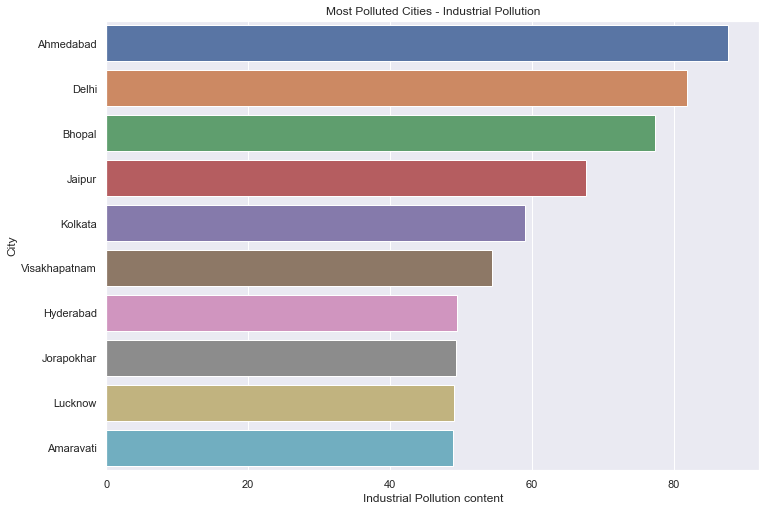

In [43]:
sns.barplot(data = data1, x = 'Industrial Pollution content', y = data1.index).set(title='Most Polluted Cities - Industrial Pollution')

In [44]:
data2 = df[['City','Vehicular Pollution content']].groupby(["City"]).median().sort_values(by = 'Vehicular Pollution content',
    ascending = False).head(10)
data2

,Vehicular Pollution content
City,
Delhi,477.150
Patna,282.430
Gurugram,276.250
Jaipur,272.835
Lucknow,261.640
Kochi,251.355
Ahmedabad,241.020
Bhopal,232.000
Chennai,224.440


[Text(0.5, 1.0, 'Most Polluted Cities - Vehicular Pollution')]

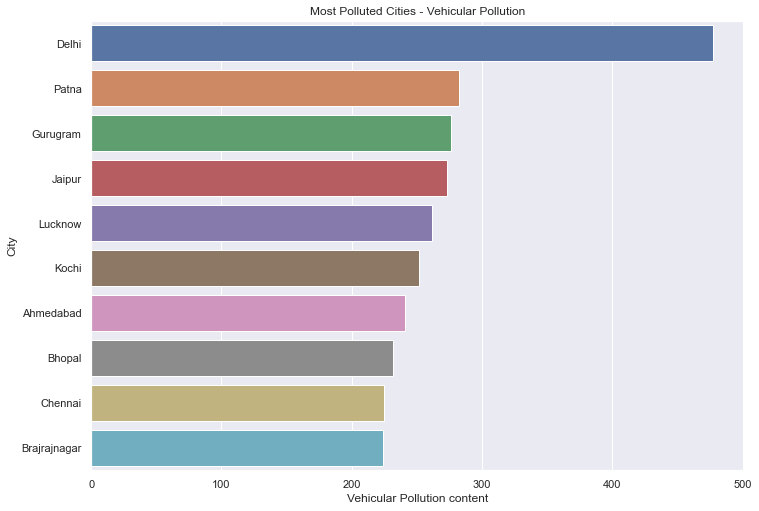

In [47]:
sns.barplot(data = data2, x = 'Vehicular Pollution content', y = data2.index).set(title='Most Polluted Cities - Vehicular Pollution')

#### Least Polluted Cities:

In [23]:
data3 = df[['City','Industrial Pollution content']].groupby(["City"]).median().sort_values(by = 'Industrial Pollution content',
    ascending = True).head(10)
data3

,Industrial Pollution content
City,
Aizawl,19.940
Kochi,22.885
Coimbatore,34.320
Brajrajnagar,34.660
Ernakulam,34.995
Chandigarh,35.160
Mumbai,40.000
Guwahati,40.035
Shillong,40.980


[Text(0.5, 1.0, 'Least Polluted Cities - Industrial Pollution')]

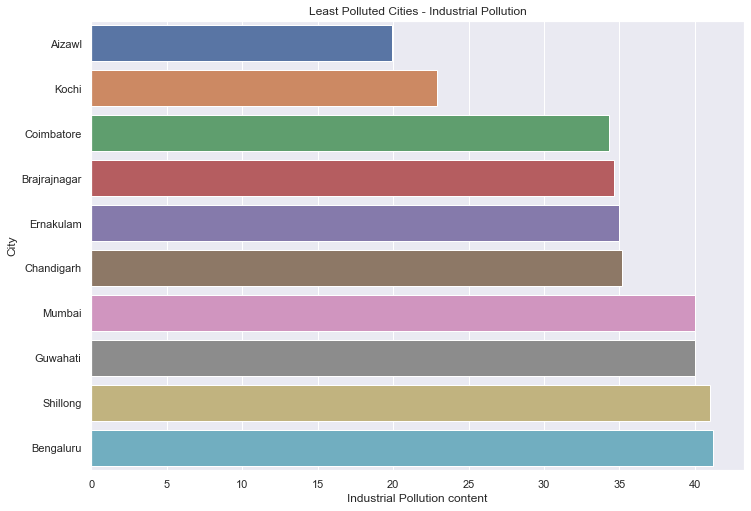

In [48]:
sns.barplot(data = data3, x = 'Industrial Pollution content', y = data3.index).set(title='Least Polluted Cities - Industrial Pollution')

In [49]:
data4 = df[['City','Vehicular Pollution content']].groupby(["City"]).median().sort_values(by = 'Vehicular Pollution content',
    ascending = True).head(10)
data4

,Vehicular Pollution content
City,
Shillong,69.660
Aizawl,81.460
Thiruvananthapuram,100.550
Ernakulam,113.935
Amaravati,143.380
Coimbatore,145.055
Chandigarh,180.440
Bengaluru,193.580
Hyderabad,205.440


[Text(0.5, 1.0, 'Least Polluted Cities - Vehicular Pollution')]

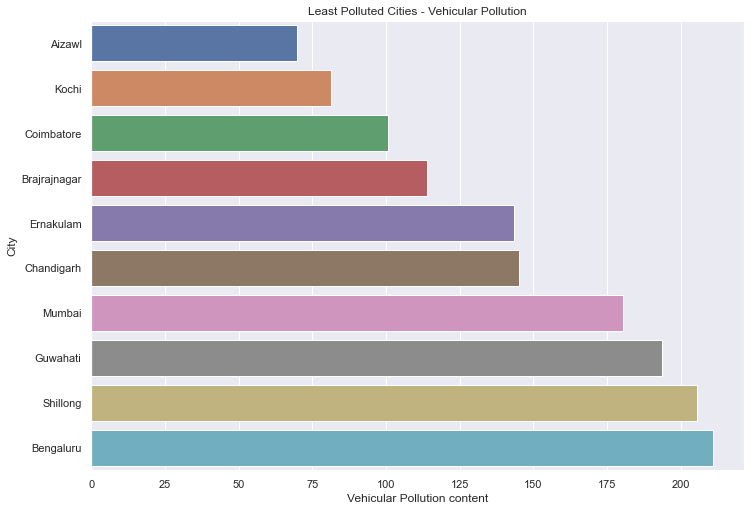

In [50]:
sns.barplot(data = data4, x = 'Vehicular Pollution content', y = data3.index).set(title='Least Polluted Cities - Vehicular Pollution')

#### Remarks:

##### For the period 2015-20:
- Most Polluted City by 
    - Industrial Pollution : Ahmedabad
    - Vehicular Pollution : Delhi
- Least Polluted City by 
    - Industrial Pollution : Aizawl
    - Vehicular Pollution : Aizawl

### Machine Learning Modeling:

#### Preprocessing:

In [56]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("Categorical Attributes :")
for (idx, elem) in enumerate(categorical_attributes):
    print(f'{idx+1}. {elem}')

Categorical Attributes :
1. City
2. Air_quality


In [57]:
df1['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

#### Remarks:

Since there are too many unique cities in the dataset, One Hot Encoding inceases dimesionality to an unreasonable point. Therefore, we use Label Encoding aeven though no particular relationship found between values in the column.

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [60]:
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  int32         
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        29531 non-null  float64       
 3   PM10         29531 non-null  float64       
 4   NO           29531 non-null  float64       
 5   NO2          29531 non-null  float64       
 6   NOx          29531 non-null  float64       
 7   NH3          29531 non-null  float64       
 8   CO           29531 non-null  float64       
 9   SO2          29531 non-null  float64       
 10  O3           29531 non-null  float64       
 11  Benzene      29531 non-null  float64       
 12  Toluene      29531 non-null  float64       
 13  Xylene       29531 non-null  float64       
 14  AQI          29531 non-null  float64       
 15  Air_quality  29531 non-null  int32         
dtypes: d

In [61]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.047806,-0.121778,-0.053770
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,0.408614
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,0.208080
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,0.259407
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,0.259199
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,0.212592
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,0.077250
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,0.215848
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,0.170843
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.084323,0.199100,0.030637


#### Remarks:

O3, Benzene have nearly  no correlation with the Target Variable - Air Quality. Therefore they will bee dropped from the dataset for model building.

In [63]:
df1.drop(['O3', 'Benzene'], axis = 1, inplace = True)
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Xylene,AQI,Air_quality
0,0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,0.02,0.00,118.0,1
1,0,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,5.50,3.77,118.0,1
2,0,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,16.40,2.25,118.0,1
3,0,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,10.14,1.00,118.0,1
4,0,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,18.89,2.78,118.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,12.07,0.73,41.0,0
29527,25,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,2.21,0.38,70.0,3
29528,25,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,0.01,0.00,68.0,3
29529,25,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,0.00,0.00,54.0,3


#### Splitting Training andd Testing Datasets:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [101]:
from sklearn.pipeline import make_pipeline

In [69]:
X = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene', 'Xylene', 'AQI']]
Y = df1["Air_quality"]

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [90]:
from collections import Counter

In [91]:
print('Classes and number of values in trainset',Counter(Y_train))

Classes and number of values in trainset Counter({1: 9484, 3: 5746, 2: 1914, 5: 1642, 0: 956, 4: 929})


#### Fixing Data Imbalance:

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
oversample = SMOTE()
X_train,Y_train = oversample.fit_resample(X_train,Y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(Y_train))

Classes and number of values in trainset after SMOTE: Counter({3: 9484, 1: 9484, 2: 9484, 0: 9484, 4: 9484, 5: 9484})


#### Testing Multiple Models:

***Random Forest:***

In [95]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, Y_train)
rf_predict = rf.predict(X_test)
rf_acc_score = accuracy_score(Y_test, rf_predict)*100
print(f'Random Forest Accuracy : {rf_acc_score}')

Random Forest Accuracy : 99.97742663656885


***SVM:***

In [107]:
cls = SVC()
cls.fit(X_train,Y_train)
svmpred = cls.predict(X_test)
svm_acc_score = accuracy_score(Y_test,svmpred)*100
print(f'SVM Accuracy : {svm_acc_score}')

SVM Accuracy : 96.10609480812641


In [115]:
pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train,Y_train)
svm_acc_score = pipe.score(X_test, Y_test) * 100
print(f'SVM Accuracy : {lgr_acc_score}')

SVM Accuracy : 94.31151241534988


In [114]:
scaler = StandardScaler()
arr = scaler.fit_transform(X)
dfx = pd.DataFrame(arr, columns = X.columns)
dfx.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Xylene,AQI
0,-1.698798,-0.26654,-0.193291,-0.731090,-0.412430,-0.472010,-0.23605,-0.183488,0.812044,-0.413394,-0.440284,-0.313054
1,-1.698798,-0.26654,-0.193291,-0.728765,-0.522191,-0.495418,-0.23605,-0.176052,0.630337,-0.095242,0.487837,-0.313054
2,-1.698798,-0.26654,-0.193291,0.035219,-0.365576,-0.046258,-0.23605,2.267235,0.896135,0.537580,0.113635,-0.313054
3,-1.698798,-0.26654,-0.193291,-0.694820,-0.401151,-0.444192,-0.23605,-0.067495,0.279859,0.174143,-0.194098,-0.313054
4,-1.698798,-0.26654,-0.193291,0.253765,-0.273602,0.227173,-0.23605,2.966167,1.499475,0.682142,0.244113,-0.313054


***Logistic Regression:***

In [104]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train,Y_train)
lgr_acc_score = pipe.score(X_test, Y_test) * 100
print(f'Logarithmic Regression Accuracy : {lgr_acc_score}')

Logarithmic Regression Accuracy : 94.31151241534988


#### Remarks:

#### After comparing common models used in the process:
- Random Forest gives the best results at 99.97% percent accuracy  

### Future Enhancements:

- Hyperparameter Tuning
- Upload as an API which could predict your Air Quality based on the values for Contaminants at the moment
- Helpful to test Air Quality of different places at different times to find when Air Quality is worst and you should stay home
- Can be used to find most polluted and least polluted places in India if you intend to move cities or immigrate (Note : It is only one of many factors and must be combined with other factors such as Infrastructre and Education to make a final decision on such decisions)